# Question 1 Apply Linear Regression to the provided dataset using underlying steps.

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [209]:
# importing the dataset values from the local folder
dataset_folder = r"D:/Machine Learning/Assignment 4/datasets/"


# a.


In [210]:
#importing the csv file from the dataset folder
salary = pd.read_csv(dataset_folder+"Salary_data.csv")

In [211]:
salary.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [212]:
#Checking for the total number of  null values
print(salary.isnull().sum()) 

YearsExperience    0
Salary             0
dtype: int64


# b.


In [207]:
X = salary.iloc[:, :-1].values
Y = salary.iloc[:, -1].values
# Spliting the data in train_test partitions, such that 1/3~0.33 of the data is reserved as test subset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [184]:
reg = LR().fit(X_train, Y_train)
#printing the complexity movement of the data which is R^2 value
print(reg.score(X_train, Y_train))
print(reg.score(X_test, Y_test))

0.9381900012894278
0.9749154407708353


# c.

In [213]:
#predict the model. 
Y_test_pred = reg.predict(X_test)

# d.

In [214]:
#Calculating the mean_squared error
mean_squared_error(Y_test, Y_test_pred)

21026037.329511296

# e.

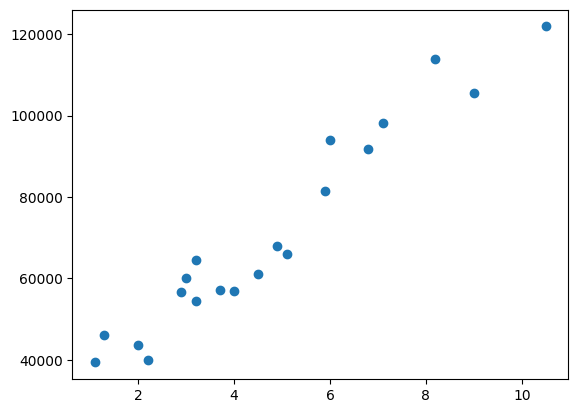

In [215]:
# a.train plot
plt.scatter(X_train, Y_train)
plt.show()

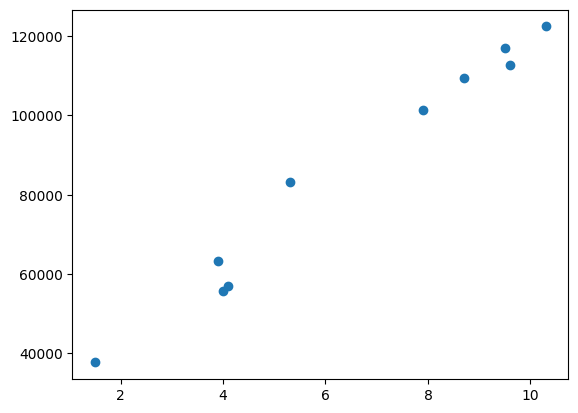

In [216]:
#test data plot
plt.scatter(X_test, Y_test)
plt.show()

# 2.Apply K means clustering in the dataset provided:



In [217]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [218]:
#importing the K-Mean_Dataset
df2=pd.read_csv("K-Mean_Dataset.csv")
df2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [219]:
#checking for the Null values and removing them
new_data_value= df2.iloc[:,1:].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(new_data_value)
new_data_value = imputer.transform(new_data_value)

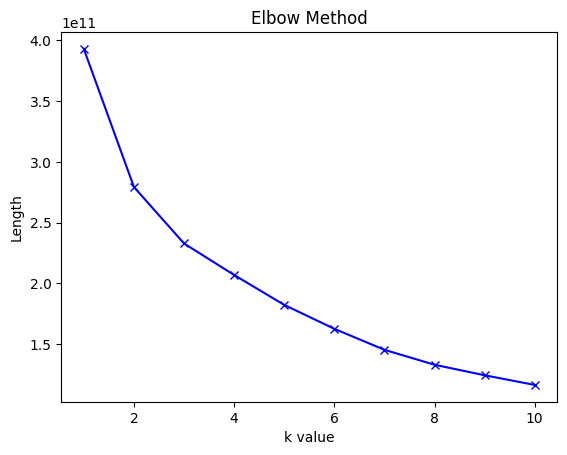

In [220]:
#Using the elbow method to find a good number of clusters with the K-Means algorithm
length = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_data_value)
    length.append(km.inertia_)

plt.plot(range(1,11),css,'bx-')
plt.xlabel('k value')
plt.title('the elbow method')
plt.ylabel('Length')
plt.title('Elbow Method')
plt.show()

In [221]:
#Calculate the silhouette score for the above clustering
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit_predict(new_data_value)
score = silhouette_score(new_data_value, k_means.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.379


# 3.Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why


In [222]:
#Trying the feature scaling and then applying  K-Means on the scaled features
mms = MinMaxScaler()
mms.fit(new_data_value)
changed_data = mms.transform(new_data_value)

In [223]:
#Calculating the silhouette score for the above scaled features
k_means_scalar = KMeans(n_clusters=5, random_state=0)
k_means_scalar.fit_predict(changed_data)
Scale_score= silhouette_score(changed_data, k_means_scalar.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % Scale_score)

Silhouetter Score: 0.319


In [169]:
#The silhouette score is poor after applying the  K-Means on the scaled features of the given dataset.
#Reasons:
#The value is near to zero ,that indicates there is no significant difference between the clusters and it denotes there would be overlapping of clusters,where a high value indicates that the object is well matched to its own cluster.
#Also,the data is not accurate and does not follow normal distribution.

